In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Importing the required libraries
from IPython.display import Javascript

# Define a JavaScript function to keep the Colab session active
def keep_colab_alive():
    js_code = '''
    function ClickConnect(){
        console.log("Working");
        document.querySelector("colab-toolbar-button").click()
    }
    setInterval(ClickConnect, 60000);
    '''
    return Javascript(js_code)

# Call the function to keep the session active
keep_colab_alive()

<IPython.core.display.Javascript object>

In [ ]:
#changing the working directory
%cd gdrive

/content/gdrive


In [ ]:
ls

MyDrive/


In [ ]:
cd MyDrive/

/content/gdrive/MyDrive


In [ ]:
import csv
# Importing the libraries
import numpy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score, roc_curve
import time

In [ ]:
df = pd.read_csv('ToN_IoT_Test_Network.csv', sep=',')
df.shape

(461043, 45)

In [ ]:
# Count the occurrences of each class
class_counts = df['type'].value_counts()

In [ ]:
# Set the desired number of samples for the normal class
desired_samples = 30000  # You can adjust this number as needed

# Get the class label for the normal class
normal_class = 'normal'  # Assuming 'normal' is the label for the normal class

In [ ]:
# Get the indices of samples belonging to the normal class
normal_indices = df[df['type'] == normal_class].index

# Randomly sample 'desired_samples' indices from the normal class
selected_indices = np.random.choice(normal_indices, desired_samples, replace=False)

In [ ]:
# Drop the excess samples from the normal class
df = df.drop(index=set(normal_indices) - set(selected_indices))

# Now 'df_reduced' contains the dataset with reduced samples from the normal class

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 191043 entries, 2 to 461042
Data columns (total 45 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ts                      191043 non-null  int64  
 1   src_ip                  191043 non-null  object 
 2   src_port                191043 non-null  int64  
 3   dst_ip                  191043 non-null  object 
 4   dst_port                191043 non-null  int64  
 5   proto                   191043 non-null  object 
 6   service                 191043 non-null  object 
 7   duration                191043 non-null  float64
 8   src_bytes               191043 non-null  int64  
 9   dst_bytes               191043 non-null  int64  
 10  conn_state              191043 non-null  object 
 11  missed_bytes            191043 non-null  int64  
 12  src_pkts                191043 non-null  int64  
 13  src_ip_bytes            191043 non-null  int64  
 14  dst_pkts                1

In [ ]:
df

,ts,src_ip,src_port,dst_ip,dst_port,proto,service,duration,src_bytes,dst_bytes,...,http_response_body_len,http_status_code,http_user_agent,http_orig_mime_types,http_resp_mime_types,weird_name,weird_addl,weird_notice,label,type
2,1554198359,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,bad_TCP_checksum,-,F,0,normal
3,1554198359,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
42,1554198419,192.168.1.152,1880,192.168.1.152,51782,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
43,1554198419,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
56,1554198439,192.168.1.152,34296,192.168.1.152,10502,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
461038,1556340862,192.168.1.32,33108,176.28.50.165,80,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,xss
461039,1556423390,192.168.1.33,37242,34.230.157.88,443,tcp,-,0.000000,0,0,...,0,0,-,-,-,-,-,-,1,ransomware
461040,1556436603,192.168.1.37,4444,192.168.1.193,49178,tcp,-,290.371539,101568,2592,...,0,0,-,-,-,-,-,-,1,backdoor
461041,1556540442,192.168.1.31,60816,104.98.29.100,443,tcp,-,23.190902,32,31,...,0,0,-,-,-,-,-,-,1,mitm


In [ ]:
# Drop the columns you don't need
df = df.drop(['src_ip','src_port','dst_ip','dst_port','ts'], axis=1)
df.shape

In [ ]:
X = df.drop(['type'], axis=1) # axis =1 mean column , axis is equal to 0 mean rows

In [ ]:
y = df['type']

In [ ]:
# Import label encoder
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'type'
y = label_encoder.fit_transform(df['type'])

# Print original string values and their corresponding encoded values
for i, val in enumerate(label_encoder.classes_):
    print(f"{val} = is mapped to = {i}")

backdoor = is mapped to = 0
ddos = is mapped to = 1
dos = is mapped to = 2
injection = is mapped to = 3
mitm = is mapped to = 4
normal = is mapped to = 5
password = is mapped to = 6
ransomware = is mapped to = 7
scanning = is mapped to = 8
xss = is mapped to = 9


In [ ]:
from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
X  = X.apply(LabelEncoder().fit_transform)

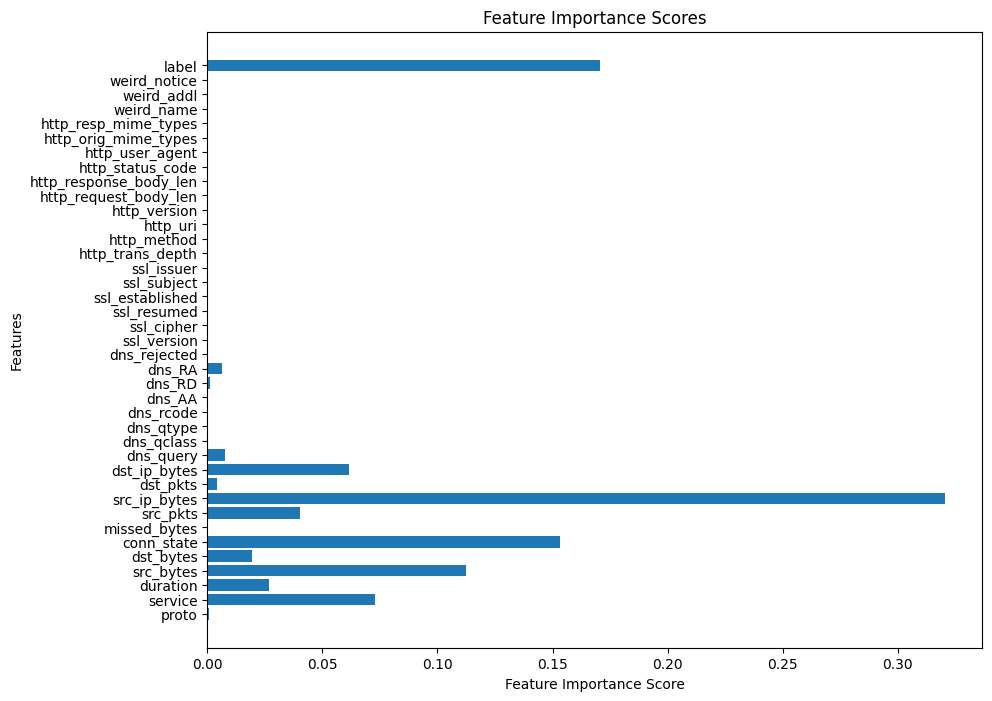

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X, y)

# Get feature importances
importance_scores = clf.feature_importances_

# Get feature names
feature_names = X

# Plot the feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(importance_scores)), importance_scores, align='center')
plt.yticks(range(len(importance_scores)), feature_names)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Feature Importance Scores')
plt.show()


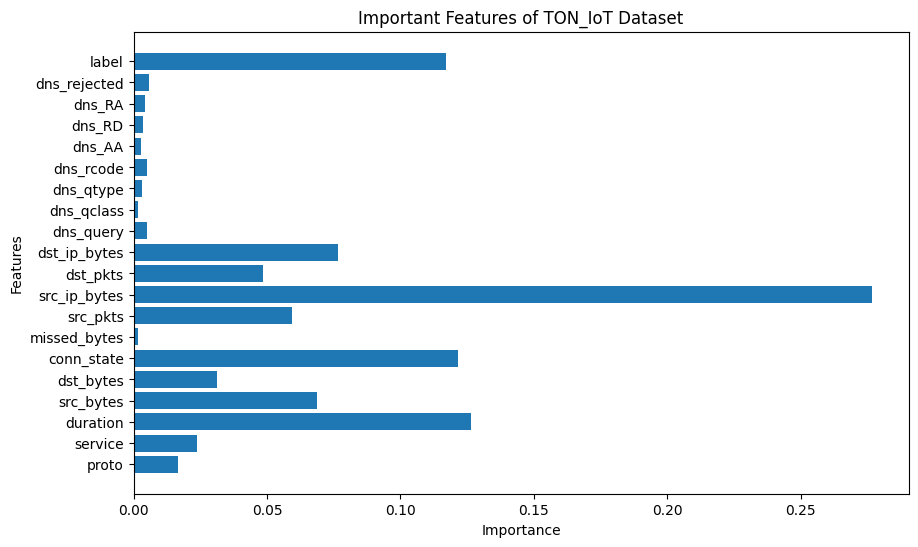

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

# Initialize RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model
clf.fit(X, y)

# Feature importance
feature_importance = clf.feature_importances_

# Select features with importance greater than threshold
sfm = SelectFromModel(clf, threshold=0.0001)
sfm.fit(X, y)

# Transform the feature matrix
X_selected = sfm.transform(X)

# Get the selected feature names
selected_feature_names = X.columns[sfm.get_support()]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(selected_feature_names, sfm.estimator_.feature_importances_[sfm.get_support()])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Important Features of TON_IoT Dataset')
plt.show()

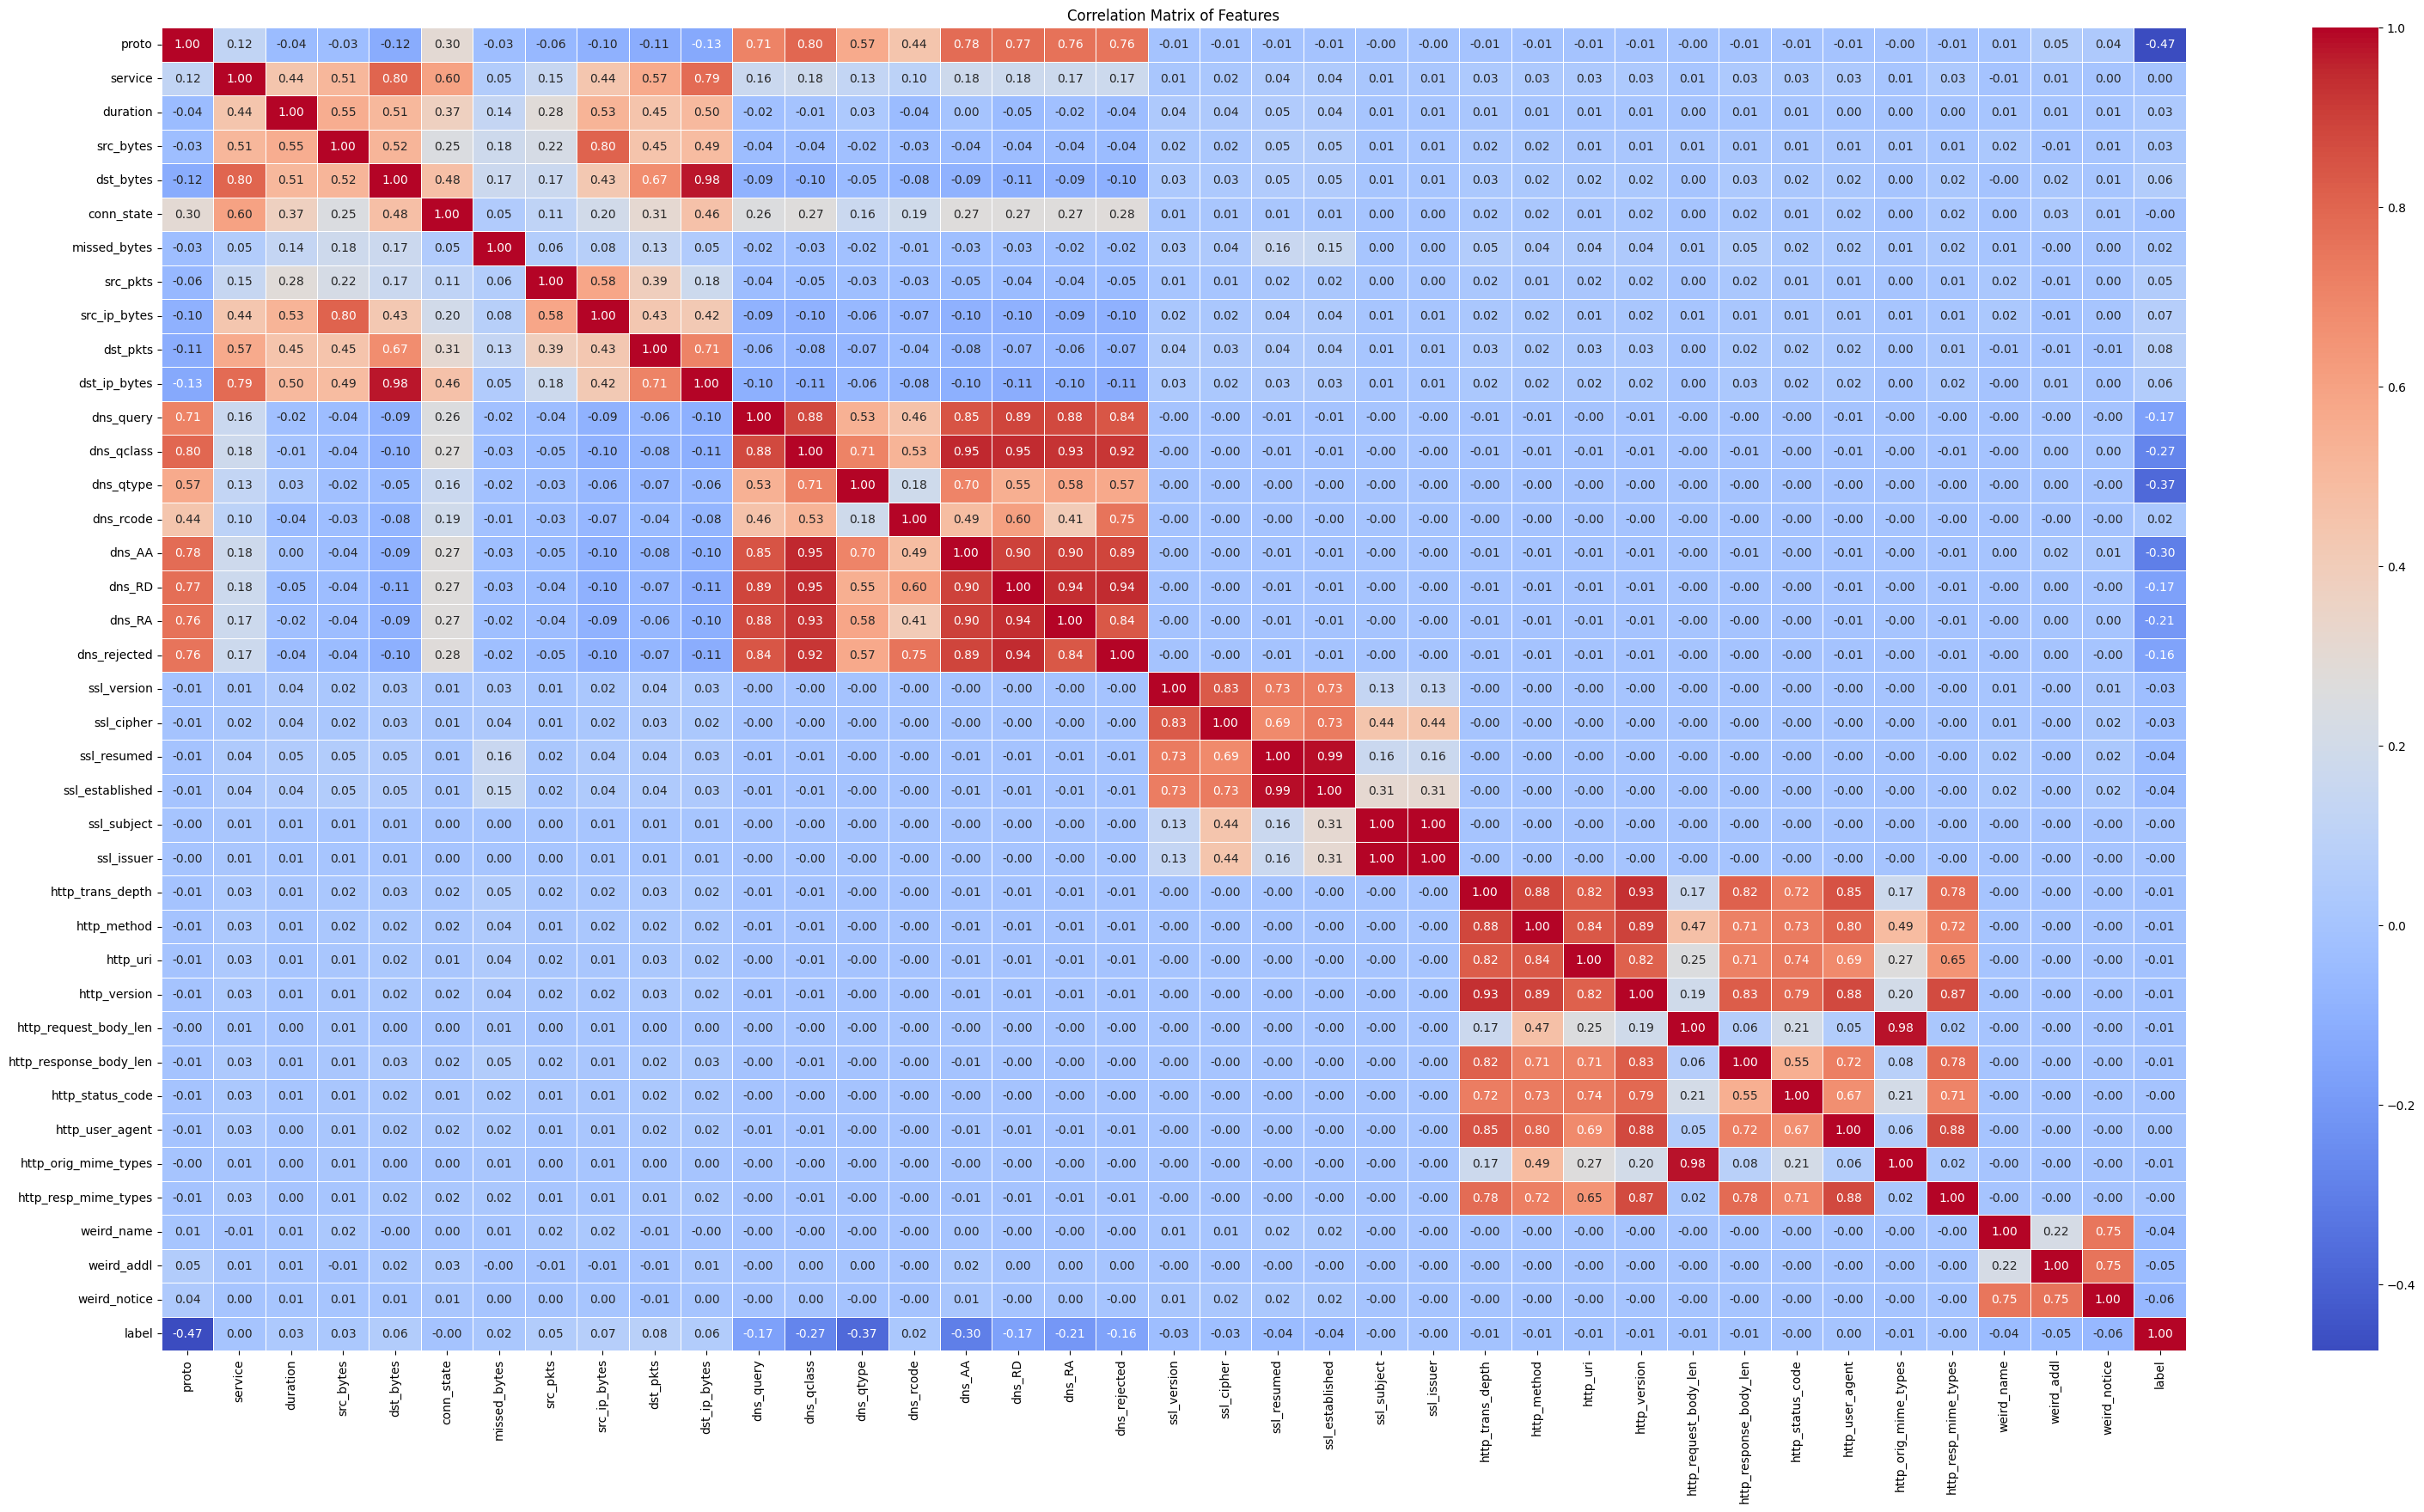

In [ ]:
import seaborn as sns
# Compute the correlation matrix
correlation_matrix = X.corr()

# Plot the heatmap
plt.figure(figsize=(38, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
from imblearn.over_sampling import ADASYN
from collections import Counter
# count the number of samples in each class
print('Original dataset shape %s' % Counter(y))

# use ADASYN to balance the classes
adasyn = ADASYN(random_state=42)
X, y = adasyn.fit_resample(X, y)

# count the number of samples in each class after resampling
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({5: 30000, 8: 20000, 2: 20000, 3: 20000, 1: 20000, 6: 20000, 9: 20000, 7: 20000, 0: 20000, 4: 1043})
Resampled dataset shape Counter({9: 30786, 0: 30025, 5: 30000, 6: 29960, 2: 29921, 4: 29852, 3: 29837, 8: 29829, 7: 29554, 1: 29368})


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
# count the number of samples in each class
print('Original dataset shape %s' % Counter(y))

# use RandomUnderSampler to balance the classes
rus = RandomUnderSampler(random_state=42)
X, y = rus.fit_resample(X, y)

# count the number of samples in each class after resampling
print('Resampled dataset shape %s' % Counter(y))

Original dataset shape Counter({9: 30786, 0: 30025, 5: 30000, 6: 29960, 2: 29921, 4: 29852, 3: 29837, 8: 29829, 7: 29554, 1: 29368})
Resampled dataset shape Counter({0: 29368, 1: 29368, 2: 29368, 3: 29368, 4: 29368, 5: 29368, 6: 29368, 7: 29368, 8: 29368, 9: 29368})


In [ ]:
from sklearn.decomposition import PCA

# Fit the PCA object to your data
pca = PCA(n_components=20).fit(X)

# Transform the data using the fitted PCA object
X_reduced = pca.transform(X)

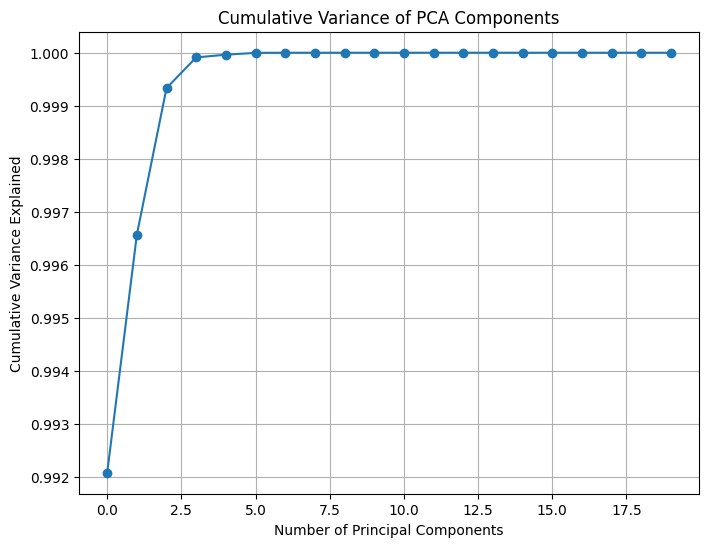

In [ ]:
# Calculate cumulative variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative variance
plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance of PCA Components')
plt.grid(True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_reduced, y, test_size=0.30, random_state=42)

**First Model of KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto', leaf_size=30, p=2, metric='minkowski', n_jobs=-1)

# Training Time (KNN)
t1 = time.time()
knn_model = clf.fit(X_train, y_train)
training_time = round(time.time() - t1, 3)

# Training Results
print("Training Results:")
# Prediction Time (KNN)
t2 = time.time()
y_train_pred = knn_model.predict(X_train)
training_prediction_time = round(time.time() - t2, 3)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='macro')
recall_train = recall_score(y_train, y_train_pred, average='macro')
macro_f1_train = f1_score(y_train, y_train_pred, average='macro')
micro_f1_train = f1_score(y_train, y_train_pred, average='micro')
mcc_train = matthews_corrcoef(y_train, y_train_pred)

print("Accuracy (Training):", accuracy_train)
print("Precision (Training):", precision_train)
print("Recall (Training):", recall_train)
print("Macro F1 score (Training):", macro_f1_train)
print("Micro F1 score (Training):", micro_f1_train)
print("MCC (Training):", mcc_train)
print("Training Prediction Time (KNN):", training_prediction_time, "s")

# Testing Time (KNN)
t3 = time.time()
y_test_pred = knn_model.predict(X_test)
testing_prediction_time = round(time.time() - t3, 3)

# Testing Results
print("\nTesting Results:")
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
macro_f1_test = f1_score(y_test, y_test_pred, average='macro')
micro_f1_test = f1_score(y_test, y_test_pred, average='micro')
mcc_test = matthews_corrcoef(y_test, y_test_pred)

print("Accuracy (Testing):", accuracy_test)
print("Precision (Testing):", precision_test)
print("Recall (Testing):", recall_test)
print("Macro F1 score (Testing):", macro_f1_test)
print("Micro F1 score (Testing):", micro_f1_test)
print("MCC (Testing):", mcc_test)
print("Testing Prediction Time (KNN):", testing_prediction_time, "s")

Training Results:
Accuracy (Training): 0.9582274770373266
Precision (Training): 0.9612255419859925
Recall (Training): 0.958215677598689
Macro F1 score (Training): 0.9589358822287608
Micro F1 score (Training): 0.9582274770373266
MCC (Training): 0.9537995687354018
Training Prediction Time (KNN): 251.126 s

Testing Results:
Accuracy (Testing): 0.9027929776561787
Precision (Testing): 0.9050655847292057
Recall (Testing): 0.9028142268028722
Macro F1 score (Testing): 0.9030394864714582
Micro F1 score (Testing): 0.9027929776561786
MCC (Testing): 0.8922200578106328
Testing Prediction Time (KNN): 108.105 s


**Second Model of KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf1 = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='kd_tree', leaf_size=50, p=1, metric='minkowski', n_jobs=1)

# Training Time (KNN)
t1 = time.time()
knn_model = clf1.fit(X_train, y_train)
training_time = round(time.time() - t1, 3)

# Training Results
print("Training Results:")
# Prediction Time (KNN)
t2 = time.time()
y_train_pred = knn_model.predict(X_train)
training_prediction_time = round(time.time() - t2, 3)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='macro')
recall_train = recall_score(y_train, y_train_pred, average='macro')
macro_f1_train = f1_score(y_train, y_train_pred, average='macro')
micro_f1_train = f1_score(y_train, y_train_pred, average='micro')
mcc_train = matthews_corrcoef(y_train, y_train_pred)

print("Accuracy (Training):", accuracy_train)
print("Precision (Training):", precision_train)
print("Recall (Training):", recall_train)
print("Macro F1 score (Training):", macro_f1_train)
print("Micro F1 score (Training):", micro_f1_train)
print("MCC (Training):", mcc_train)
print("Training Prediction Time (KNN):", training_prediction_time, "s")

# Testing Time (KNN)
t3 = time.time()
y_test_pred = knn_model.predict(X_test)
testing_prediction_time = round(time.time() - t3, 3)

# Testing Results
print("\nTesting Results:")
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
macro_f1_test = f1_score(y_test, y_test_pred, average='macro')
micro_f1_test = f1_score(y_test, y_test_pred, average='micro')
mcc_test = matthews_corrcoef(y_test, y_test_pred)

print("Accuracy (Testing):", accuracy_test)
print("Precision (Testing):", precision_test)
print("Recall (Testing):", recall_test)
print("Macro F1 score (Testing):", macro_f1_test)
print("Micro F1 score (Testing):", micro_f1_test)
print("MCC (Testing):", mcc_test)
print("Testing Prediction Time (KNN):", testing_prediction_time, "s")

Training Results:
Accuracy (Training): 0.9197283564588626
Precision (Training): 0.9219367850917152
Recall (Training): 0.9196916418598228
Macro F1 score (Training): 0.9202325891820291
Micro F1 score (Training): 0.9197283564588626
MCC (Training): 0.9109484395152033
Training Prediction Time (KNN): 53.252 s

Testing Results:
Accuracy (Testing): 0.8973096215230278
Precision (Testing): 0.8994953965970757
Recall (Testing): 0.8973833229705942
Macro F1 score (Testing): 0.8976889444360419
Micro F1 score (Testing): 0.897309621523028
MCC (Testing): 0.8860725492412468
Testing Prediction Time (KNN): 25.489 s


**Third Model of KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf2 = KNeighborsClassifier(n_neighbors=9, weights='distance', algorithm='ball_tree', leaf_size=40, p=3, metric='minkowski', n_jobs=-1)

# Training Time (KNN)
t1 = time.time()
knn_model = clf2.fit(X_train, y_train)
training_time = round(time.time() - t1, 3)

# Training Results
print("Training Results:")
# Prediction Time (KNN)
t2 = time.time()
y_train_pred = knn_model.predict(X_train)
training_prediction_time = round(time.time() - t2, 3)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='macro')
recall_train = recall_score(y_train, y_train_pred, average='macro')
macro_f1_train = f1_score(y_train, y_train_pred, average='macro')
micro_f1_train = f1_score(y_train, y_train_pred, average='micro')
mcc_train = matthews_corrcoef(y_train, y_train_pred)

print("Accuracy (Training):", accuracy_train)
print("Precision (Training):", precision_train)
print("Recall (Training):", recall_train)
print("Macro F1 score (Training):", macro_f1_train)
print("Micro F1 score (Training):", micro_f1_train)
print("MCC (Training):", mcc_train)
print("Training Prediction Time (KNN):", training_prediction_time, "s")

# Testing Time (KNN)
t3 = time.time()
y_test_pred = knn_model.predict(X_test)
testing_prediction_time = round(time.time() - t3, 3)

# Testing Results
print("\nTesting Results:")
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
macro_f1_test = f1_score(y_test, y_test_pred, average='macro')
micro_f1_test = f1_score(y_test, y_test_pred, average='micro')
mcc_test = matthews_corrcoef(y_test, y_test_pred)

print("Accuracy (Testing):", accuracy_test)
print("Precision (Testing):", precision_test)
print("Recall (Testing):", recall_test)
print("Macro F1 score (Testing):", macro_f1_test)
print("Micro F1 score (Testing):", micro_f1_test)
print("MCC (Testing):", mcc_test)
print("Testing Prediction Time (KNN):", testing_prediction_time, "s")

Training Results:
Accuracy (Training): 0.9585352745749462
Precision (Training): 0.9614853283226514
Recall (Training): 0.9585219563689084
Macro F1 score (Training): 0.9592109511801967
Micro F1 score (Training): 0.9585352745749462
MCC (Training): 0.954143599555225
Training Prediction Time (KNN): 459.66 s

Testing Results:
Accuracy (Testing): 0.8874487004103967
Precision (Testing): 0.8899003284743557
Recall (Testing): 0.8874842329205853
Macro F1 score (Testing): 0.8874395503019116
Micro F1 score (Testing): 0.8874487004103967
MCC (Testing): 0.8752440909605543
Testing Prediction Time (KNN): 199.825 s


**Fourth Model of KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf3 = KNeighborsClassifier(n_neighbors=11, weights='uniform', algorithm='brute', leaf_size=20, p=4, metric='minkowski', n_jobs=1)

# Training Time (KNN)
t1 = time.time()
knn_model = clf3.fit(X_train, y_train)
training_time = round(time.time() - t1, 3)

# Training Results
print("Training Results:")
# Prediction Time (KNN)
t2 = time.time()
y_train_pred = knn_model.predict(X_train)
training_prediction_time = round(time.time() - t2, 3)

accuracy_train = accuracy_score(y_train, y_train_pred)
precision_train = precision_score(y_train, y_train_pred, average='macro')
recall_train = recall_score(y_train, y_train_pred, average='macro')
macro_f1_train = f1_score(y_train, y_train_pred, average='macro')
micro_f1_train = f1_score(y_train, y_train_pred, average='micro')
mcc_train = matthews_corrcoef(y_train, y_train_pred)

print("Accuracy (Training):", accuracy_train)
print("Precision (Training):", precision_train)
print("Recall (Training):", recall_train)
print("Macro F1 score (Training):", macro_f1_train)
print("Micro F1 score (Training):", micro_f1_train)
print("MCC (Training):", mcc_train)
print("Training Prediction Time (KNN):", training_prediction_time, "s")

# Testing Time (KNN)
t3 = time.time()
y_test_pred = knn_model.predict(X_test)
testing_prediction_time = round(time.time() - t3, 3)

# Testing Results
print("\nTesting Results:")
accuracy_test = accuracy_score(y_test, y_test_pred)
precision_test = precision_score(y_test, y_test_pred, average='macro')
recall_test = recall_score(y_test, y_test_pred, average='macro')
macro_f1_test = f1_score(y_test, y_test_pred, average='macro')
micro_f1_test = f1_score(y_test, y_test_pred, average='micro')
mcc_test = matthews_corrcoef(y_test, y_test_pred)

print("Accuracy (Testing):", accuracy_test)
print("Precision (Testing):", precision_test)
print("Recall (Testing):", recall_test)
print("Macro F1 score (Testing):", macro_f1_test)
print("Micro F1 score (Testing):", micro_f1_test)
print("MCC (Testing):", mcc_test)
print("Testing Prediction Time (KNN):", testing_prediction_time, "s")

Training Results:
Accuracy (Training): 0.858397867455345
Precision (Training): 0.8608440212341115
Recall (Training): 0.8584212979186173
Macro F1 score (Training): 0.8579260771922472
Micro F1 score (Training): 0.8583978674553451
MCC (Training): 0.8430632653845043
Training Prediction Time (KNN): 20488.667 s

Testing Results:
Accuracy (Testing): 0.8381458276582221
Precision (Testing): 0.8400219706229267
Recall (Testing): 0.8380736621818082
Macro F1 score (Testing): 0.837296756941208
Micro F1 score (Testing): 0.8381458276582221
MCC (Testing): 0.8205654263472637
Testing Prediction Time (KNN): 8732.537 s
